In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [6]:
df['Release Clause']=df['Release Clause'].str.replace(r"€","")
df['Release Clause']=df['Release Clause'].str.replace(r"M","000000")
df['Release Clause']=df['Release Clause'].str.replace(r"K","000")
df['Release Clause']=df['Release Clause'].astype(float)

In [7]:
x=df['Potential'][:2000]

In [8]:
df['Release Clause']=df['Release Clause'].fillna(0)

In [9]:
y=df['Release Clause'][:2000]

In [10]:
y=df['Release Clause'][:2000]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [12]:
x_trainnp=x_train.to_numpy()
x_trainnp=x_trainnp.reshape(-1,1)
x_testnp=x_test.to_numpy()
x_testnp=x_testnp.reshape(-1,1)
y_trainnp=y_train.to_numpy()


In [13]:
scaler=StandardScaler().fit(x_trainnp)
std_x=scaler.transform(x_trainnp)
std_x_test=scaler.transform(x_testnp)

In [14]:
lr=LinearRegression()
lr.fit(std_x,y_trainnp)

LinearRegression()

In [15]:
predicted=lr.predict(std_x_test)

In [16]:
lr.intercept_,lr.coef_

(2620772.790437501, array([1270535.41982069]))

In [17]:
from sklearn import metrics

In [18]:
rmse=metrics.r2_score(y_test,predicted)
print('Root mean squared error: ', rmse)

Root mean squared error:  0.002810930121730393


In [19]:
x_mean=x.mean()
y_mean=y.mean()
n=2000
SS_xy=np.sum(y*x)-n*y_mean*x_mean
SS_xx=np.sum(x*x)-n*x_mean*x_mean
b1=SS_xy/SS_xx
b0=y_mean-b1*x_mean
print('bo=',b0)
print('b1=',b1)

bo= -20313643.36628956
b1= 284810.3256195504


In [20]:
scaler1=StandardScaler().fit(x_trainnp)
std_x=scaler.transform(x_trainnp)
std_x_test=scaler.transform(x_testnp)

In [21]:
iterations=1000
alpha=0.001
n=len(x)
m_curr=0
b_curr=0
n

2000

In [22]:
for i in range(iterations):
    y_pred=m_curr*x+b_curr
    cost=1/n*sum([val**2 for val in(y-y_pred)])
#     if(math.isclose(y,y-y_pred)):
#         break
    md=(-2/n)*sum(x*(y-y_pred))
    mb=(-2/n)*sum(y-y_pred)
    m_curr=m_curr-alpha*md
    b_curr=b_curr-alpha*mb
    print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

m 420408.58909200004, b 5115.245234200013, cost 103321303150519.7 iteration 0
m -4596366.268349904, b -57300.30229036731, cost 1069643784613139.4 iteration 1
m 55269496.26133588, b 686138.1408092899, cost 1.386736589869355e+17 iteration 2
m -659117832.3532791, b -8186786.876282485, cost 1.9733441601091846e+19 iteration 3
m 7865761739.054548, b 97693639.64346713, cost 2.810022155991684e+21 iteration 4
m -93862766523.33456, b -1165793028.0149243, cost 4.0014624643047874e+23 iteration 5
m 1120077369243.892, b 13911561016.299534, cost 5.698069803896656e+25 iteration 6
m -13366032656874.826, b -166008523032.64157, cost 8.114033253449338e+27 iteration 7
m 159498656058981.34, b 1981001906051.379, cost 1.1554357511234687e+30 iteration 8
m -1903318798105595.0, b -23639560746310.258, cost 1.6453368297532238e+32 iteration 9
m 2.271255782086393e+16, b 282094040587642.6, cost 2.342954405478719e+34 iteration 10
m -2.7103199068342214e+17, b -3366265921423861.0, cost 3.336359611530445e+36 iteration 11

m -5.278463542811e+133, b -6.555946365162072e+131, cost 1.2654552676927311e+269 iteration 119
m 6.298861154449086e+134, b 7.823298494959201e+132, cost 1.8020042709563133e+271 iteration 120
m -7.516515274044735e+135, b -9.335646744529352e+133, cost 2.5660483427955986e+273 iteration 121
m 8.969558223241646e+136, b 1.1140352141081025e+135, cost 3.6540446677573574e+275 iteration 122
m -1.0703493811544988e+138, b -1.3293931231921784e+136, cost 5.203347969437917e+277 iteration 123
m 1.277262234353143e+139, b 1.5863825968962521e+137, cost 7.409550936789943e+279 iteration 124
m -1.5241741099015483e+140, b -1.893051573557273e+138, cost 1.0551176935955572e+282 iteration 125
m 1.8188173538777303e+141, b 2.2590037656486133e+139, cost 1.502484235327735e+284 iteration 126
m -2.1704190782904955e+142, b -2.695699411730727e+140, cost 2.1395327659755375e+286 iteration 127
m 2.589990119329008e+143, b 3.2168141677792385e+141, cost 3.0466878447377093e+288 iteration 128
m -3.090669855107091e+144, b -3.83866

OverflowError: (34, 'Result too large')

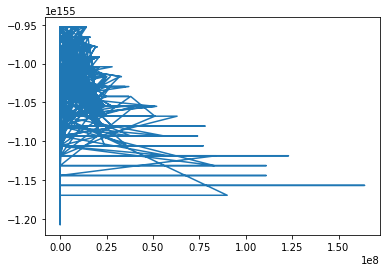

In [25]:
plt.plot(y,y_pred)